In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk

%matplotlib inline

/Users/ryanlapcevic/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
df = pd.read_csv('./SPX_010350_120516.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,12/2/2016,2191.120117,2197.949951,2188.370117,2191.949951,3779500000,2191.949951
1,12/1/2016,2200.169922,2202.600098,2187.439941,2191.080078,5063740000,2191.080078
2,11/30/2016,2204.969971,2214.100098,2198.810059,2198.810059,5533980000,2198.810059
3,11/29/2016,2200.760010,2210.459961,2198.149902,2204.659912,3706560000,2204.659912
4,11/28/2016,2210.209961,2211.139893,2200.360107,2201.719971,3505650000,2201.719971


In [7]:
df.shape

(16840, 7)

In [9]:
df['Date'].min()

'1/10/1950'

In [40]:
df['Date'].max()

'9/9/2016'

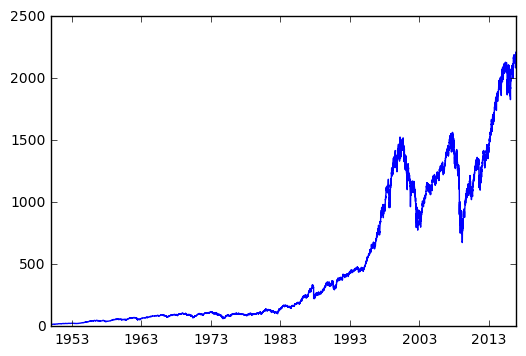

In [10]:
plt.plot(pd.to_datetime(df['Date']), df['Adj Close']);

In [2]:
from luminol import *

In [3]:
from luminol.modules.time_series import TimeSeries

In [4]:
tslist = reversed(df.ix[:,[0,-1]].values)
tsdict = {}
i = 0
for row in tslist:
    tsdict[i] = float(row[1])
    i += 1

NameError: name 'df' is not defined

In [110]:
ts = TimeSeries(tsdict)

In [111]:
from luminol.anomaly_detector import AnomalyDetector

In [112]:
ts

TimeSeries<start=0, end=16839>

In [1]:
ad = AnomalyDetector(ts, algorithm_name='derivative_detector', algorithm_params={'smoothing factor': 0.2})

NameError: name 'AnomalyDetector' is not defined

In [114]:
anoms = ad.get_anomalies()

In [106]:
for a in anoms:
    end = df.ix[a.start_timestamp,0]
    start = df.ix[a.end_timestamp,0]

    print(start + '-' + end + '-' + str(a.anomaly_score))

11/8/2016-11/8/2016-3.73062557811
11/4/2016-11/4/2016-7.73528235353
10/10/2016-10/10/2016-4.49941332272
9/19/2016-9/19/2016-3.07408213819
9/6/2016-9/12/2016-7.4324767673
8/4/2016-8/4/2016-2.9055224573
7/7/2016-7/7/2016-5.1625806796
6/23/2016-6/29/2016-10.698955893
6/20/2016-6/21/2016-6.19439892366
6/16/2016-6/16/2016-2.91173134221
5/23/2016-5/23/2016-4.31664744902
4/12/2016-4/12/2016-3.1575755956
4/6/2016-4/6/2016-3.28335522841
3/10/2016-3/10/2016-5.35234095218
2/29/2016-2/29/2016-7.74698914925
2/18/2016-2/18/2016-3.79751317124
2/11/2016-2/16/2016-3.67047961779
2/8/2016-2/9/2016-4.69150976704
2/3/2016-2/4/2016-3.75175729834
1/28/2016-2/1/2016-6.39136566158
1/20/2016-1/21/2016-3.39241969615
1/14/2016-1/15/2016-4.82161545847
1/8/2016-1/12/2016-5.16277106146
1/6/2016-1/6/2016-5.33732778552
1/4/2016-1/4/2016-4.67160104281
12/23/2015-12/24/2015-3.52894596101
12/17/2015-12/17/2015-4.02089130537
12/9/2015-12/11/2015-4.16261337592
12/3/2015-12/3/2015-5.05625003925
11/24/2015-11/27/2015-4.05085

In [115]:
aas = list(ad.get_all_scores().iteritems())
df2 = pd.DataFrame(aas, columns=['date', 'score'])

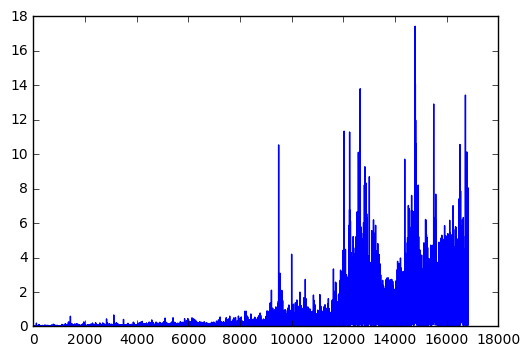

In [116]:
plt.plot(df2['date'], df2['score']);

In [ ]:


clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(xtrain)
y_pred_train = clf.predict(xtrain)
#y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [15]:
# Randomized probability of obtaining set vals given strangeness measure
def pfn(vals, strangeness_fn):
    a_n = strangeness_fn(vals[-1])
    i_greater = 0
    i_equal = 0
    n = len(vals)
    for k in range(0, n-1):
        a_k = strangeness_fn(val[k])
        if a_k > a_n: i_greater += 1
        elif a_k == a_n: i_equal += 1
    theta = np.random.rand()
    pval = (i_greater + theta*i_equal)/n
    retdfurn pval

In [21]:
epsilon = 0.92

class RandomizedPowerMartingale:
    
    def __init__(self, pfn, sfn, epsilon):
        self._pfn = pfn
        self._sfn = sfn
        self._epsilon = epsilon
        self._pval_i = 1
        self._m_ip = 1
        self._m_i = 1
        self._i = 0
        
    def stream(self, stream):
        val = stream.next()
        while val is not None:
            self._pval_i = self._pfn(item)
            self._m_ip = self._m_i
            self._m_i *= self._epsilon*self._pval_i**(self._epsilon-1)          
            i += 1
            val = stream.next()
            
    def test1(self, lamb):
        return self._m_i >= lamb
   
    def test2(self, t):
        return abs(self._m_i - self._m_ip) >= t

In [14]:
def randomized_power_martingale(stream, strangeness_fn):
    '''Calculates the value of the martingale for each data point in the data stream.

       Args:
            stream (iterable): A sequence of data points (possibly multidimensional)
            strangeness_fn (callable): A function returning a measure of a given 
            data point's strangeness compared to others.'''
    
    pval = 1        # Likelihood of obtaining data observed so far
    Mns = []        # List of martingale values for each data point
    Mn = 1          # Value of martingale up to nth data point
    alphas = []     # Store list of observed strangeness values
    n = 0           # Number of observed data points
    epsilon = 0.92  # Define Martingale family to use

    # Iterate through data stream
    data_point = stream.next()
    while data_point is not None:
        n += 1      # Increment number of observed data points

        # 1: Compute and store scalar `alpha` measuring 'strangeness' of the nth data point
        an = strangeness_fn(data_point)
        alphas.append(an)
        
        # 2: Update likelihood of observing the n data points
        theta = random() # Random real between 0 and 1
        num_a_greater = len([a for a in alphas if a > an]) # Number of points stranger than current
        num_a_equal = len([a for a in alphas if a == an]) # Number of points as strange as current
        pval = (num_a_greater + theta*num_a_equal)/n # 'Randomized' pval at point `n`
        
        # 3: Compute and store value of power martingale at point n
        Mn *= epsilon*pval**(epsilon-1)
        Mns.append(Mn)

        # 4: Move to next data point
        data_point = stream.next()

    # Return all martingale values computed for time series
    return Mns    

### Project Overview


### Data Overview
A time series is a sequence of data points indexed by ordered time. Many datasets fits this description, such as stock market indices, meteorological measurements, and network latency. 

Our algorithm works with n-dimensional vectors of real numbers received in chronological order over fixed and variable time intervals. To evaluate the algorithm's performance, we analyzed the closing values of the S&P 500 Index between January 10th, 1950 and September 9th, 2016. 


### Algorithm

#### Out-of-core Anomaly Detection

##### Kernel Function
-The kernel function generalizes the familiar notion of 'distance' between data points. In our algorithm, we use the Gaussian kernel, which is applicable to a diverse array of different problem domains. More refined kernels can be used to inject domain-specific knowledge into the algorithm's notion of distance.

##### Adiabatic Iterative SVM / 'Strangeness' Function
-Traditional support vector machines (SVM's) work on complete training datasets to identify sets of hyperplanes that separate data points into classes. This approach is problematic for on-line problems, where storing and computing with the complete dataset is often computationally infeasible. Our algorithm implements <i>adiabatic iterative SVM</i> to compute support vectors for new data in an interative fashion using the support vectors computed using prior data. This approach uses the kernel function to separate data points and compute a <i>strangeness</i> value whose magnitude reflects how different a given data point is from the rest. 

##### Randomized Probability Function
-The randomized power martingale function uses the randomized probability of observing a given data point given the prior observed data. This is defined as 
$$ p_n = \frac{ \#\{i: \alpha_i > \alpha_n\}+\theta_n\{\alpha_i = \alpha_n\} }{n} $$

##### Randomized Power Martingale
-The randomized power martingale is defined as 
$$M_n^\epsilon=\prod_{i=1}^{n} \epsilon p_{i}^{\epsilon-1}$$

The value of this product changes rapidly when the probability of observing a series of data points is low, meaning that there is evidence that exchangeability has been violated (i.e. an anomaly has occurred). 




Pseudocode